# 1. Playing in Ipython

## Start in Ipython

I always start coding in ipython to quickly prototype code and play around.

However, Ipython is not a real development environment; when things get serious, I start making my own packages with PyCharm and version control software. Things will quickly become too complex if you only stay in ipython!

### examples of playing around

IPython (now being renamed to Jupyter) is awesome. You can do all sorts of fun stuff, i.e.

In [4]:
#used to import plotting stuff
%pylab inline   

Populating the interactive namespace from numpy and matplotlib


In [5]:
import seaborn as sns # Makes plots prettier
sns.set_context('poster', font_scale=1.25)

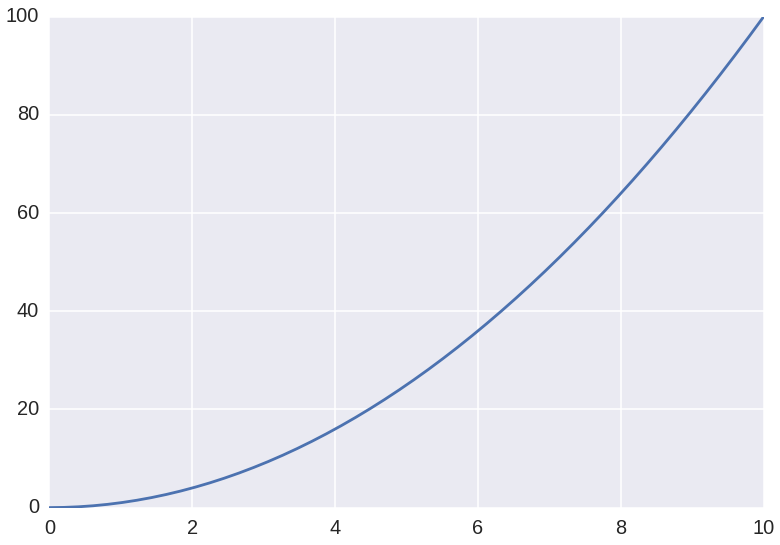

In [6]:
x = np.linspace(0, 10)
plt.plot(x, x**2)

You can also type in Markdown, i.e.

* Hi
   * Hello
* Math is fun $x^2 + y^2 + z^2$

You can also pull in fun things from the web, i.e.

In [7]:
import IPython.display as d

In [8]:
d.Image(url='http://www.nyan.cat/cats/original.gif')

You can quickly prototype code. Let's make a do-work function.

In [9]:
def do_work(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [10]:
%timeit do_work()

10 loops, best of 3: 42 ms per loop


You can quickly prototype code in cython as well.

In [11]:
%load_ext cython

In [12]:
%%cython -a 

cpdef do_work_faster(num_simulations=10**6):
    x = 0
    for i in range(num_simulations):
        x += 1
    return x

In [14]:
%timeit do_work_faster()

100 loops, best of 3: 18.5 ms per loop


Yellow lines are bad. We need to optimize our code.

In [17]:
%%cython -a 

cpdef int do_work_fastest(int num_simulations=10**6):
    cdef int x = 0
    cdef int i
    with nogil:
        for i in range(num_simulations):
            x += 1
        return x

In [21]:
%timeit do_work_fastest()

The slowest run took 152.72 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 53.7 ns per loop


Ok that is pretty fast.

## Question

When our code becomes too complicated in IPython, where do we go? Pycharm! Or another development environment.